# Dependencias

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Dataset

In [ ]:
# Carregar o conjunto de dados MNIST como exemplo
(X_train, _), (X_test, _) = mnist.load_data()

# Pré-processamento dos dados (apenas para exemplo, adapte conforme necessário)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Modelo (INCOMPLETO)

In [ ]:
# Definir a arquitetura do autoencoder
input_dim = 784  # Número de features na entrada (28x28 para MNIST)
encoding_dim = 32  # Número de neurons na camada de encoding

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = None ################### COMPLETE AQUI

# Criar o modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compilar o modelo
######## COMPLETE AQUI ################

# Visualizar a arquitetura do autoencoder
autoencoder.summary()

In [ ]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

# Treinamento

In [ ]:
# Treinar o modelo
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Avaliar o modelo nos dados de teste
score = autoencoder.evaluate(X_test, X_test)
print("Loss nos dados de teste:", score)

# Teste

In [ ]:
# Reconstruir alguns exemplos de dados de teste e comparar com os originais
num_examples = 10
decoded_imgs = autoencoder.predict(X_test[:num_examples])

# Plotar alguns exemplos
plt.figure(figsize=(20, 4))
for i in range(num_examples):
    # Imagem original
    ax = plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída pelo autoencoder
    ax = plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Questões

Complete o modelo com a última camada e também faça a compilação escolhendo a ativação e função de perda.

Modelo Esperado:

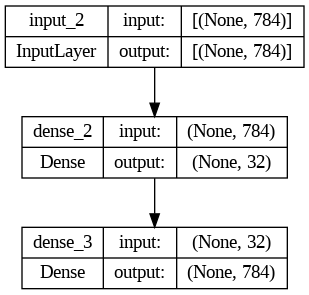

Resultado Esperado (Menos de 0.10 de loss na avalição):

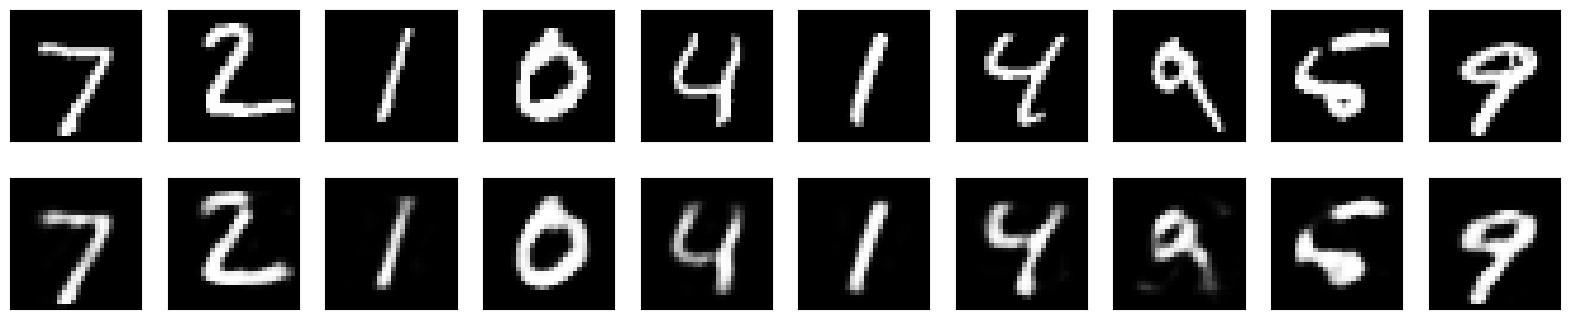